1 _ Quantos valores nulos existem no conjunto de dados após a leitura do arquivo CSV?


2 _ Qual é a distribuição do tipo de transação no conjunto de dados?


3 _ Após o mapeamento do tipo de transação para valores numéricos, como as transações "CASH_OUT" e "TRANSFER" são representadas?


4 _ Qual é a correlação entre as colunas numéricas do conjunto de dados?


5 _ Qual é a precisão do modelo de árvore de decisão treinado para prever fraudes em transações financeiras? 

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px  # Importe o Plotly Express aqui
import time
from sklearn.metrics import accuracy_score






In [155]:
# Carregar os dados
data = pd.read_csv(r"H:\Projetos Portifolios\dados estudos Python\credit card.csv")

# Exibir as primeiras linhas do DataFrame
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


1 _ Quantos valores nulos existem no conjunto de dados após a leitura do arquivo CSV ?

In [156]:
# Verificar a presença de valores nulos
print(data.isnull().sum())

total_null_values = data.isnull().sum().sum()
print("Quantidade total de valores nulos:", total_null_values)





step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
Quantidade total de valores nulos: 0


2 _ Qual é a distribuição do tipo de transação no conjunto de dados?

In [157]:
# Explorar a distribuição do tipo de transação
print(data['type'].value_counts())

# Mapear o tipo de transação para valores numéricos
data['type'] = data['type'].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})
data['isFraud'] = data['isFraud'].map({0: "No Fraud", 1: "Fraud"})

# Exibir as primeiras linhas do DataFrame após a modificação
print(data.head())

# Explorar a distribuição do tipo de transação
print(data['type'].value_counts())


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64
   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud           

Após o mapeamento do tipo de transação para valores numéricos, como as transações "CASH_OUT" e "TRANSFER" são representadas?

In [158]:
# Contar o número de transações de cada tipo
type_counts = data['type'].value_counts()

# Mapear os índices para os nomes das transações
type_names = {1: "CASH_OUT( SACAR )", 2: "PAYMENT( PAGAMENTO )", 3: "CASH_IN ( DEPOSITOS )", 4: "TRANSFER (TRANSFERIR)", 5: "DEBIT ( DEBITO)"}
transactions = [type_names[idx] for idx in type_counts.index]

# Criar o gráfico de pizza com legenda
figure = px.pie(data, 
                values=type_counts.values, 
                names=transactions, 
                hole=0.5, 
                title="Distribuição do Tipo de Transação",
                labels={'names': 'Tipo de Transação', 'values': 'Quantidade'})

figure.show()




 Qual é a correlação entre as colunas numéricas do conjunto de dados?

In [159]:
# Calcular a correlação apenas entre colunas numéricas
numeric_data = data.select_dtypes(include=[np.number])
correlation = numeric_data.corr()
print(correlation)



                    step      type    amount  oldbalanceOrg  newbalanceOrig  \
step            1.000000  0.012627  0.022373      -0.010058       -0.010299   
type            0.012627  1.000000  0.198987       0.260418        0.270669   
amount          0.022373  0.198987  1.000000      -0.002762       -0.007861   
oldbalanceOrg  -0.010058  0.260418 -0.002762       1.000000        0.998803   
newbalanceOrig -0.010299  0.270669 -0.007861       0.998803        1.000000   
oldbalanceDest  0.027665  0.066255  0.294137       0.066243        0.067812   
newbalanceDest  0.025888  0.079111  0.459304       0.042029        0.041837   
isFlaggedFraud  0.003277  0.003144  0.012295       0.003835        0.003776   

                oldbalanceDest  newbalanceDest  isFlaggedFraud  
step                  0.027665        0.025888        0.003277  
type                  0.066255        0.079111        0.003144  
amount                0.294137        0.459304        0.012295  
oldbalanceOrg         0.0662

In [160]:
# Dividir os dados em conjuntos de treinamento e teste
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

# Dividindo Dados
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])





C:\Users\rafae\AppData\Local\Temp\ipykernel_3836\616559740.py:13: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\rafae\AppData\Local\Temp\ipykernel_3836\616559740.py:14: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



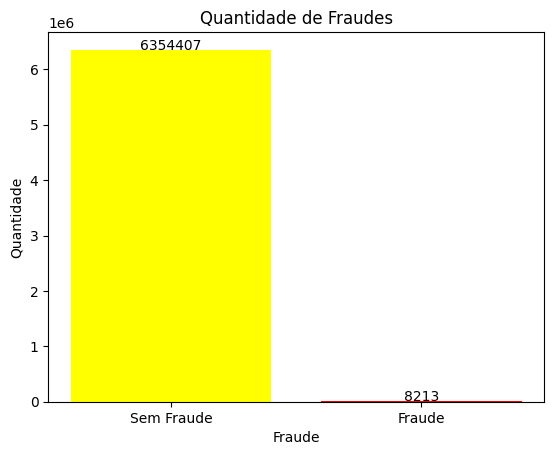

In [161]:

# Contar o número de fraudes
fraud_counts = data['isFraud'].value_counts()

# Definir as cores
colors = ['yellow', 'red']

# Plotar o gráfico de barras com cores diferentes para cada categoria
plt.bar(fraud_counts.index, fraud_counts.values, color=colors)
plt.xlabel('Fraude')
plt.ylabel('Quantidade')
plt.title('Quantidade de Fraudes')
plt.xticks(fraud_counts.index, labels=['Sem Fraude', 'Fraude'])
plt.text(0, fraud_counts[0] + 5000, str(fraud_counts[0]), ha='center')
plt.text(1, fraud_counts[1] + 5000, str(fraud_counts[1]), ha='center')
plt.show()


In [162]:
# Treinar um modelo de aprendizado de máquina
start_training = time.time()
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
end_training = time.time()
training_time = end_training - start_training

# Imprimir a precisão do modelo
print(model.score(xtest, ytest))


0.9997218127123733


In [163]:
# prediction
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(features))

['Fraud']


In [164]:
# Previsão
start_prediction = time.time()
features = np.array([[4, 9000.60, 9000.60, 0.0]])
prediction = model.predict(features)
end_prediction = time.time()
prediction_time = end_prediction - start_prediction

print("Tempo médio de treinamento:", training_time)
print("Tempo médio de previsão:", prediction_time)

Tempo médio de treinamento: 42.41381311416626
Tempo médio de previsão: 0.0
